Investigate Median Salary Vs Skill for Data Analysts

In [8]:
#import all the necessary libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

#load the data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
#well also cleanup the skills col and convert string to list type
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
#create a new df by making a copy of the original and it only contains data analyst role specific to the us
df_DA_US=df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy()

#drop all the nan values from the salary year avg col
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

In [3]:
#explode the job_skills col to get skills into individual rows
df_DA_US=df_DA_US.explode('job_skills')


In [4]:
#lets get the first 5 values of the job_skills and the salary_year_avg col
df_DA_US[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [ ]:
#now we will groupby the job_skills col 
#all the same jobs will be grouped together
#after they are grouped we will access the salary_year_avg col for each grouped job_title
#we will apply the count and median function on the salary_year_avg col
#groupby same skills->access salary_year_avg->apply aggfunc->sort according to the median values
#we create 2 df ; 1st df contains the top PAYING skills 2nd df contains the most POPULAR skills


#df that contains the top paying skills thats why we sort by median
df_DA_top_pay=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)

#get the top 10 values
df_DA_top_pay=df_DA_top_pay.head(10)

In [6]:
#again create the same df but here we will sort by the count values

#df that contains the most popular skills thats why we sort by count
df_DA_top_skills=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

#get the top 10 most popular skills and sort it by median values
df_DA_top_skills=df_DA_top_skills.head(10).sort_values(by='median',ascending=False)
df_DA_top_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


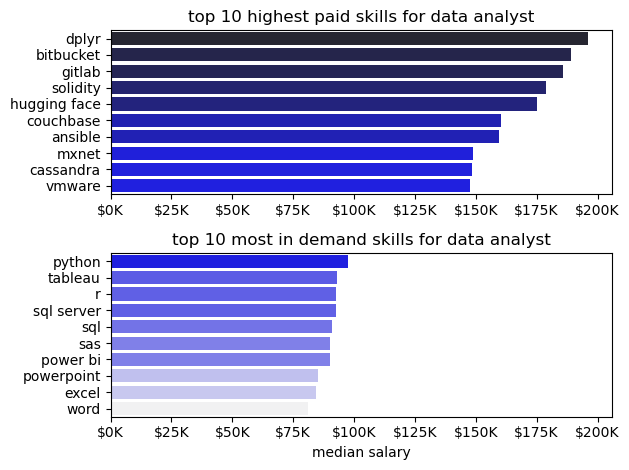

In [9]:
#now lets plot this
#since we need to plot 2 plots we use subplots
#2 figures in 1 col
fig, ax=plt.subplots(2,1)

#df_DA_top_pay.plot(kind='barh',y='median' ,ax=ax[0],legend=False)

#top 10 most highest paid skills for data analyst
#now well plot this using seaborn, palette='dark:b_r' here b_r means reverse the dark colors of blue
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median',palette='dark:b_r')
ax[0].set_title('top 10 highest paid skills for data analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().remove()
#modify the values int the x axis
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}K'))

#df_DA_skills.plot(kind='barh',y='median',ax=ax[1], legend=False)

#top 10 most in demand skills for data analyst
#now well plot this using seaborn
sns.barplot(data=df_DA_top_skills, x='median', y=df_DA_top_skills.index, ax=ax[1],hue='median',palette='light:b')
ax[1].set_title('top 10 most in demand skills for data analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('median salary')
#modify the x axis set the 2nd graph axis acc to the first one
ax[1].set_xlim(ax[0].get_xlim())
#modify the values in the x axis
ax[1].legend().remove()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}K'))

#to avoid overlap
fig.tight_layout()
plt.show()